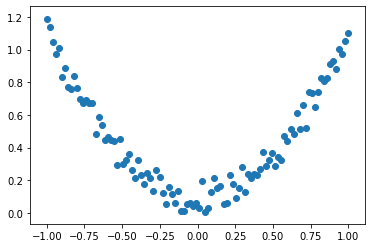

In [1]:
# https://morvanzhou.github.io/tutorials/machine-learning/torch/3-01-regression/

import torch
import matplotlib.pyplot as plt 

# 產生一個隨機數據
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# 使用 plt 畫出圖形
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [2]:
import torch
import torch.nn.functional as F     # 激勵函數

class Net(torch.nn.Module):  # 繼承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 繼承 __init__ 功能
        # 定義各層樣式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隱藏層線性輸出
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 輸出層線性輸出

    def forward(self, x):   #  Module 中的 forward 功能
        # 正向傳播輸入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激勵函數(隱藏層的線性值)
        x = self.predict(x)             # 输出值
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)

print(net)  # net 結構

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


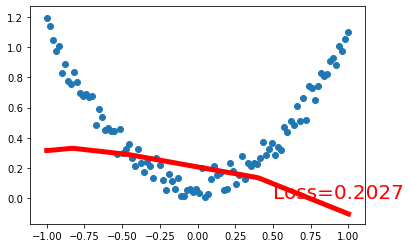

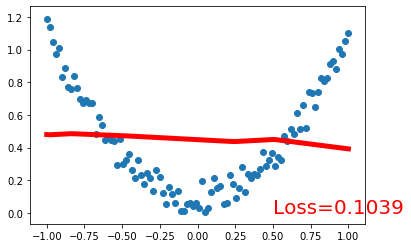

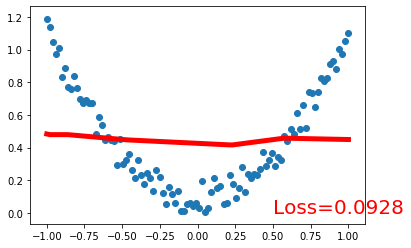

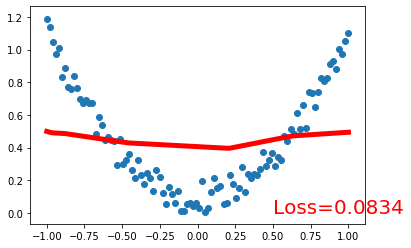

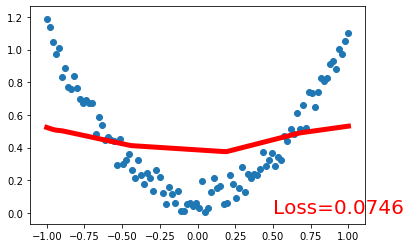

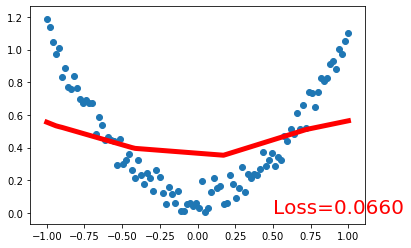

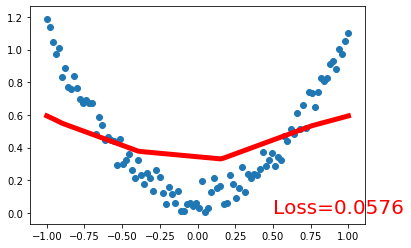

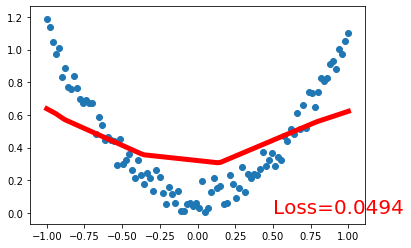

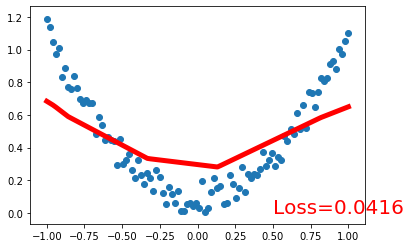

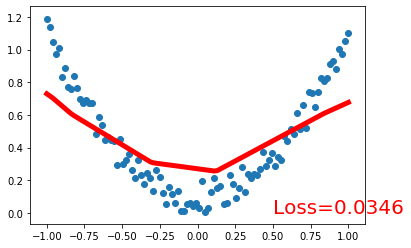

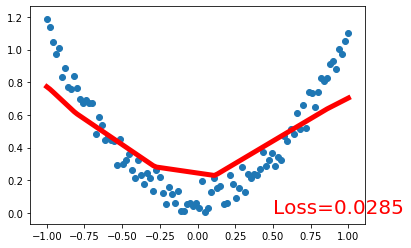

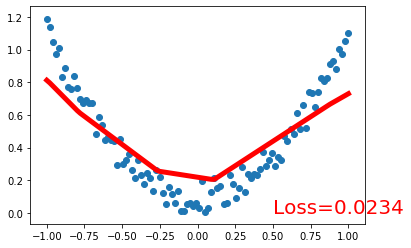

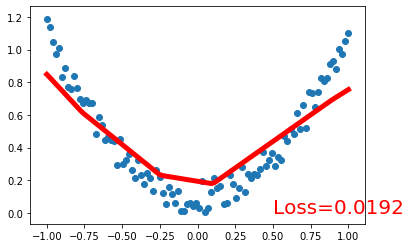

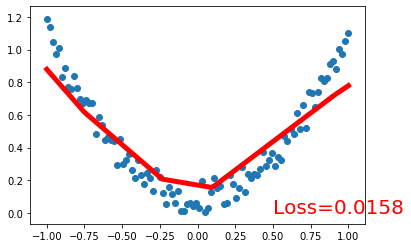

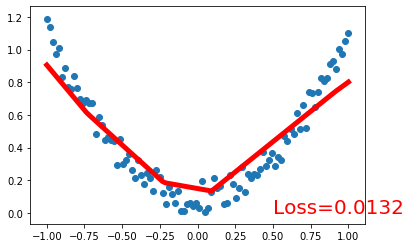

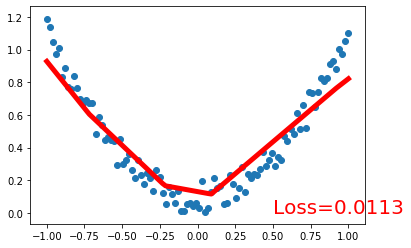

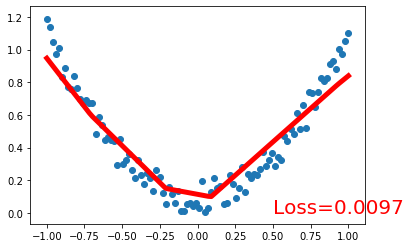

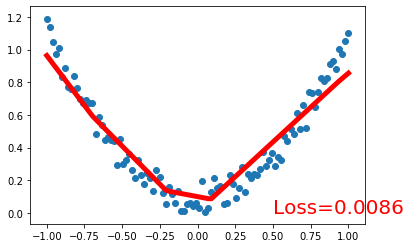

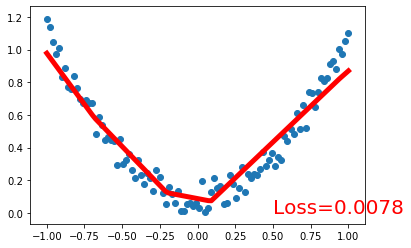

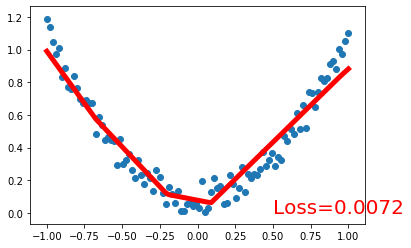

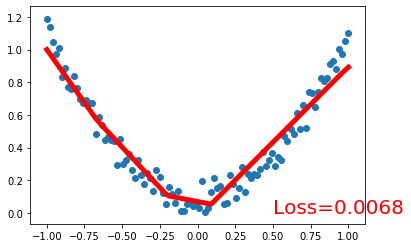

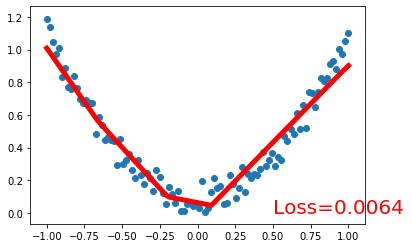

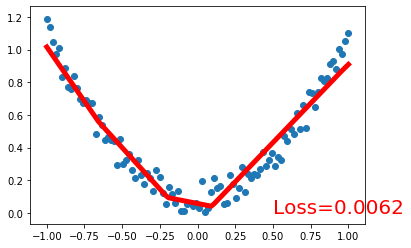

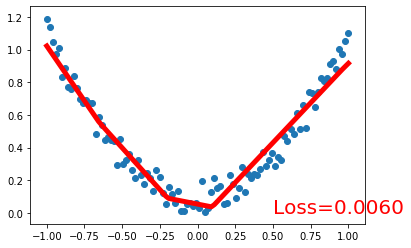

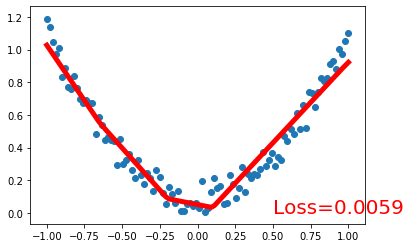

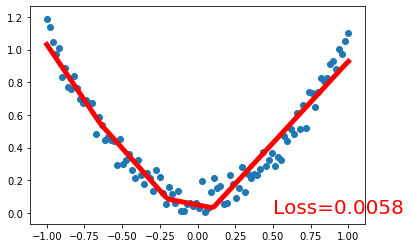

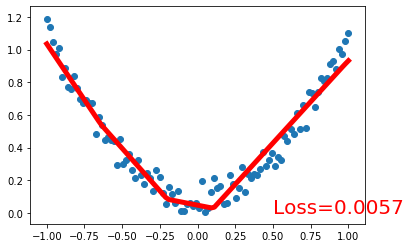

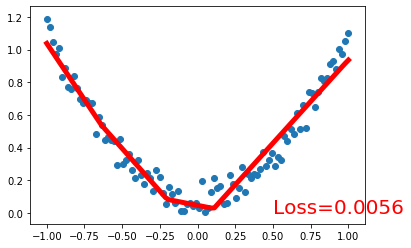

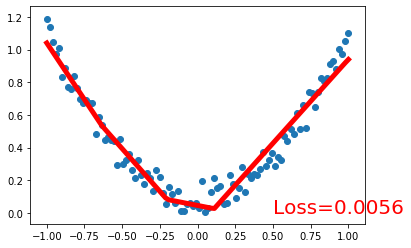

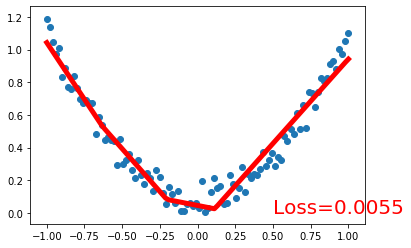

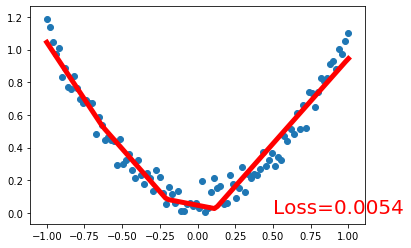

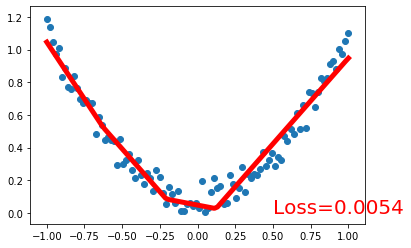

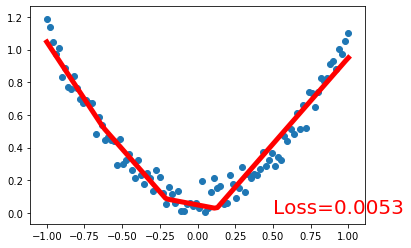

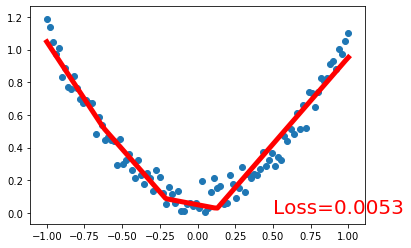

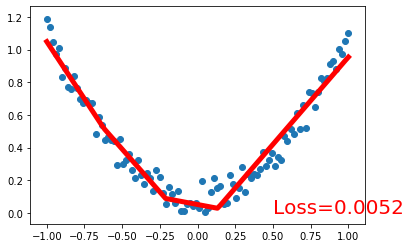

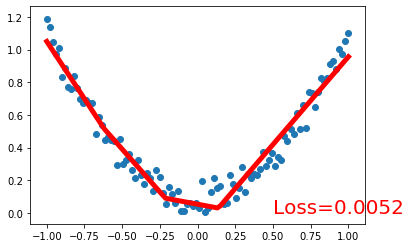

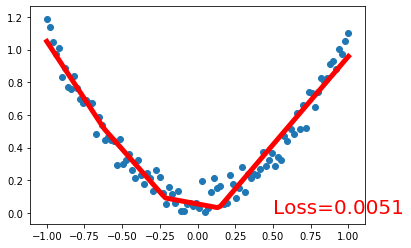

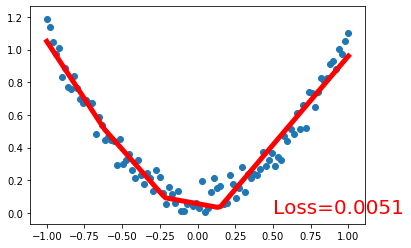

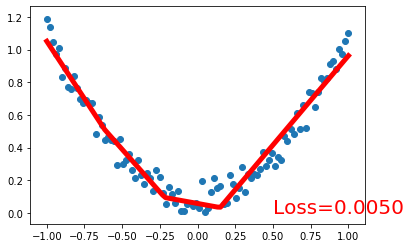

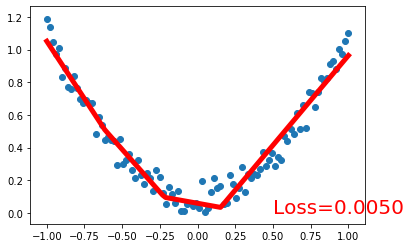

In [3]:
import matplotlib.pyplot as plt

optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 設定 net 的所有參數, 學習率
loss_func = torch.nn.MSELoss()      # 預測值和真實值的誤差計算公式 (均方差)

plt.ion()   # 畫出圖
plt.show()

for t in range(200):        # 200 次
    prediction = net(x)     # 輸入數據給 net, 输出预测值

    loss = loss_func(prediction, y)     # 計算兩者的誤差
    
    optimizer.zero_grad()   # 清空數據更新参数值
    loss.backward()
    optimizer.step()

    # 畫出訓練的狀況
    if t % 5 == 0:
        
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5) #圖
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'}) # Loss 值
        plt.pause(0.1)